# 06 - Scoring the signatures of predefined gene sets

Evaluating specific gene sets informed by domain knowledge before downstream analysis allows us to better identify sub-cell types and other relevant groupings, which we then explicitly model during the inference of perturbation effects.

In [5]:
from libraries import *
from parameters import *

In [2]:
os.getcwd()
os.chdir(projectDir)

In [3]:
adata = sc.read(par_save_filename_5)

In [8]:
cGenes = pd.read_csv(par_predefined_genesets_filename)

computing score 'pDC genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'pDC genes', score of gene set (adata.obs).
    550 total control genes are used. (0:00:07)


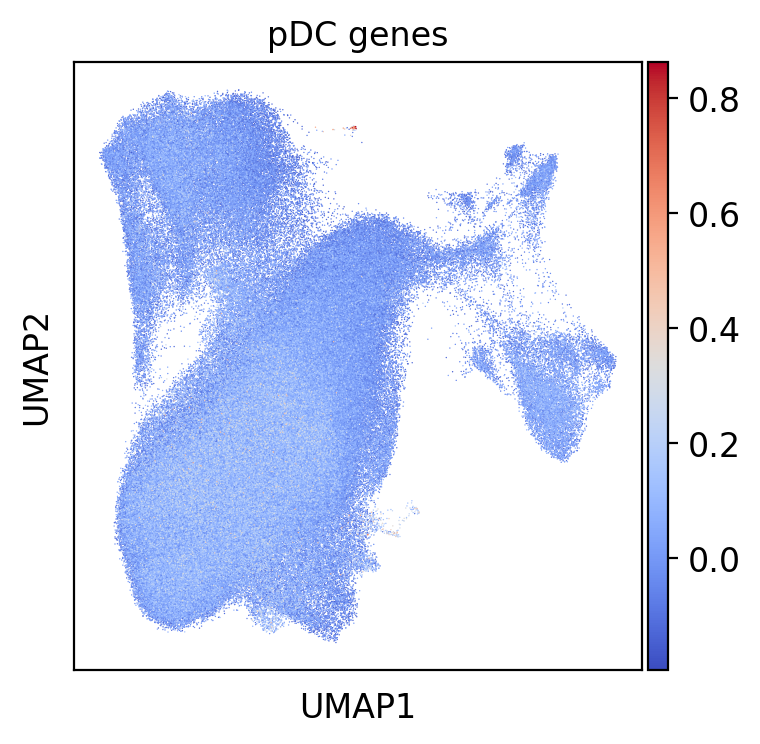

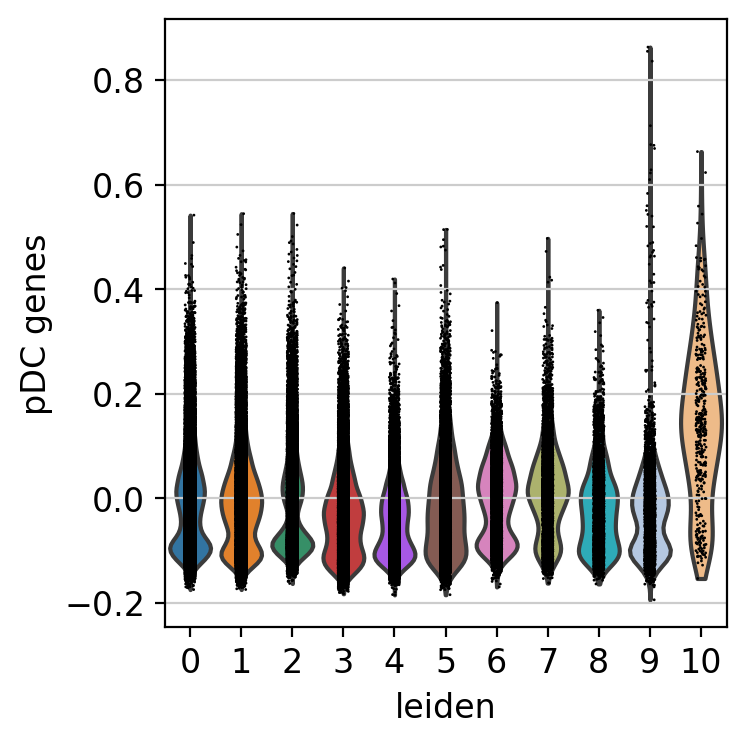

computing score 'T/NK genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'T/NK genes', score of gene set (adata.obs).
    1083 total control genes are used. (0:00:08)


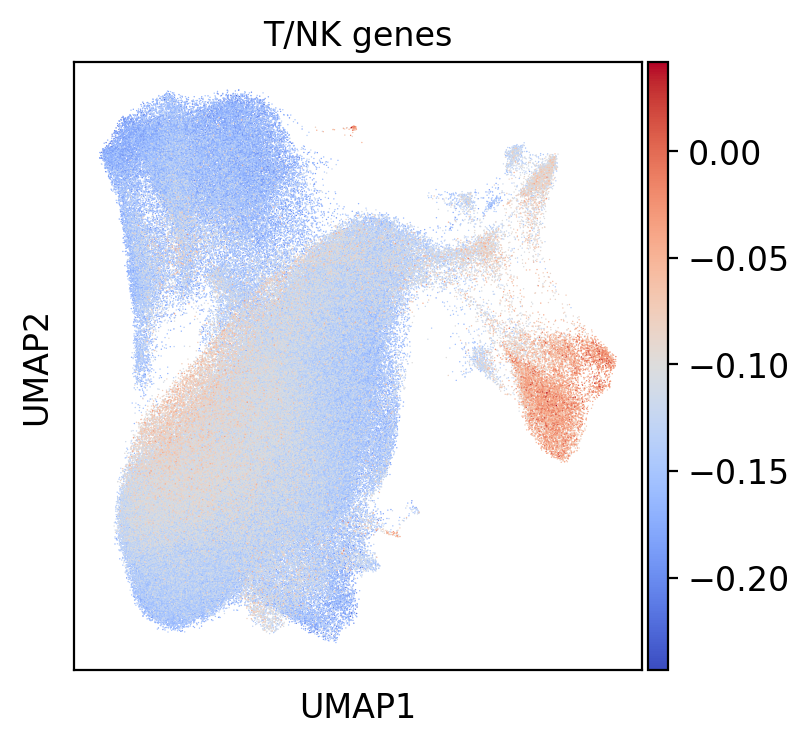

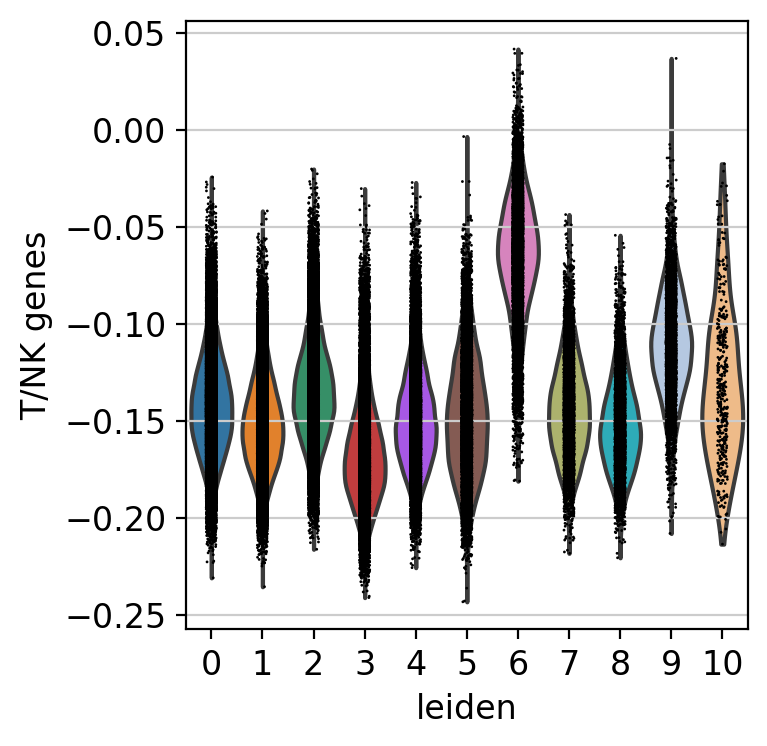

computing score 'B cell genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'B cell genes', score of gene set (adata.obs).
    748 total control genes are used. (0:00:12)


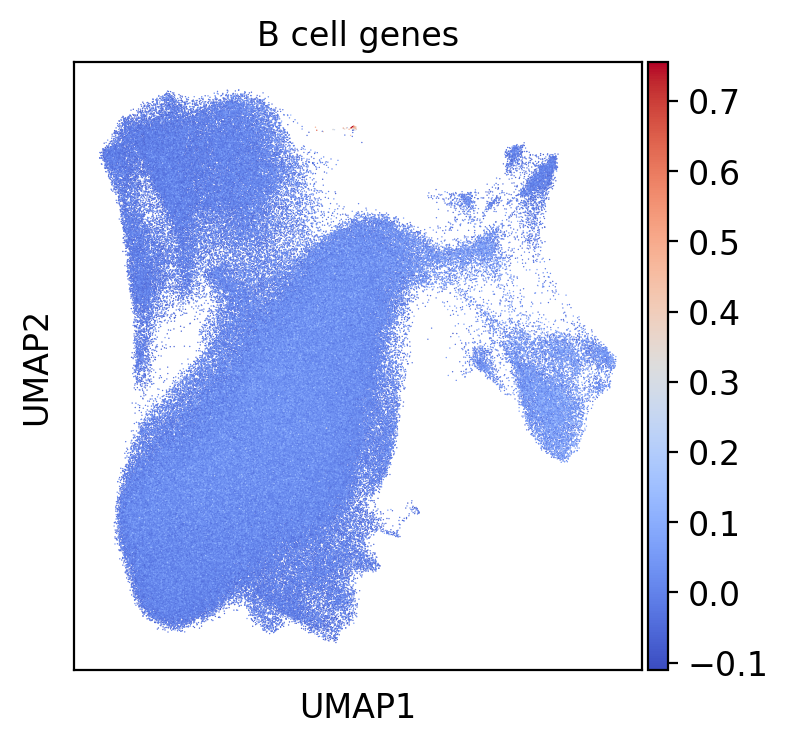

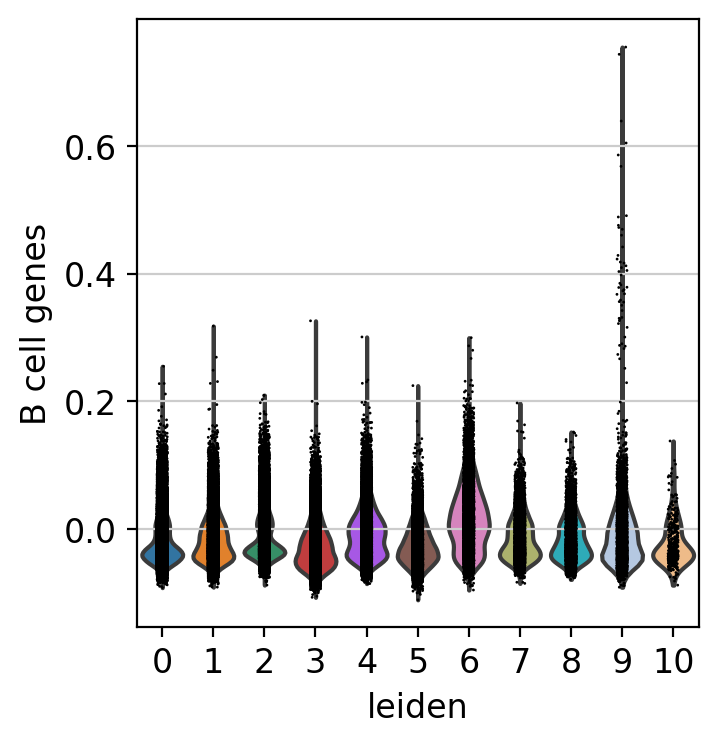

computing score 'Neutrophil genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'Neutrophil genes', score of gene set (adata.obs).
    659 total control genes are used. (0:00:08)


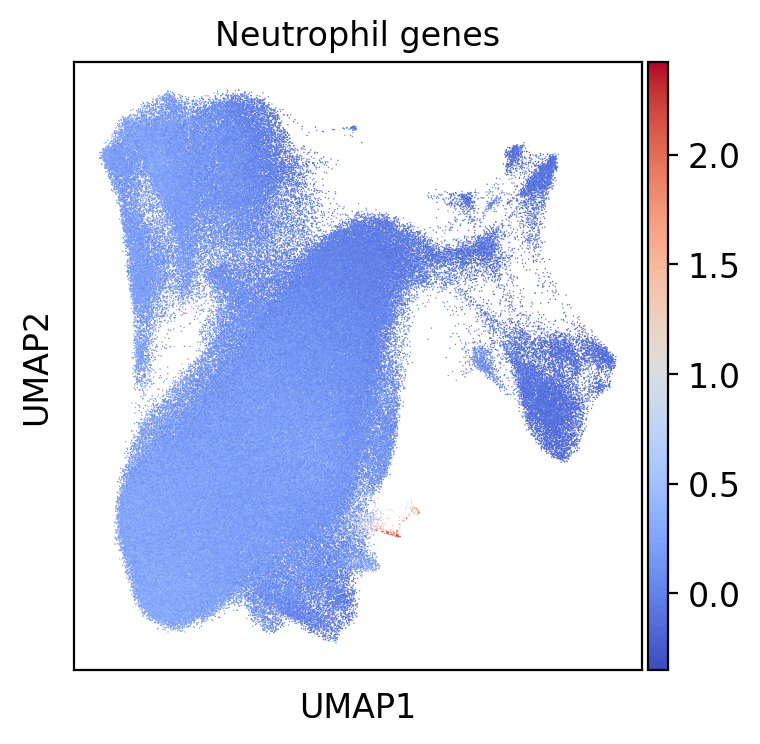

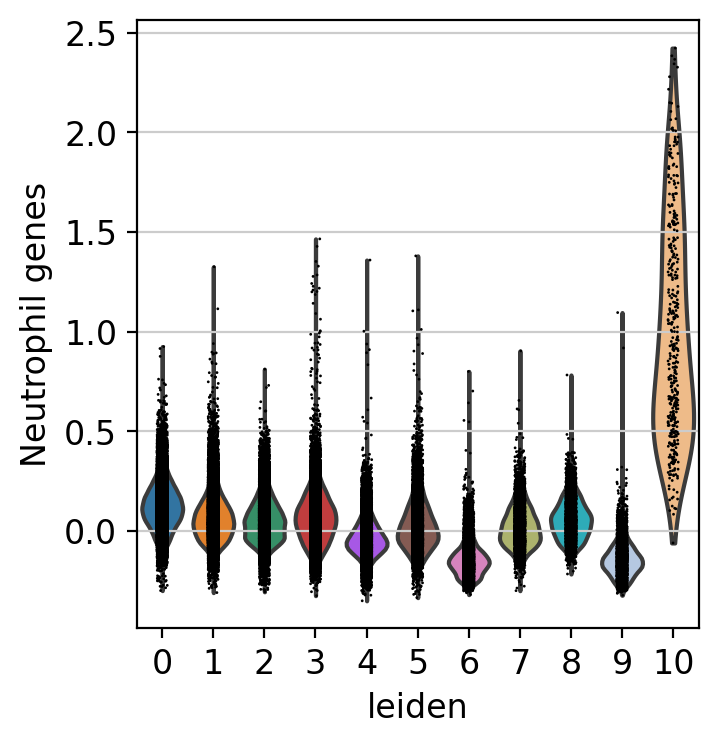

computing score 'Macrophage genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'Macrophage genes', score of gene set (adata.obs).
    1123 total control genes are used. (0:00:10)


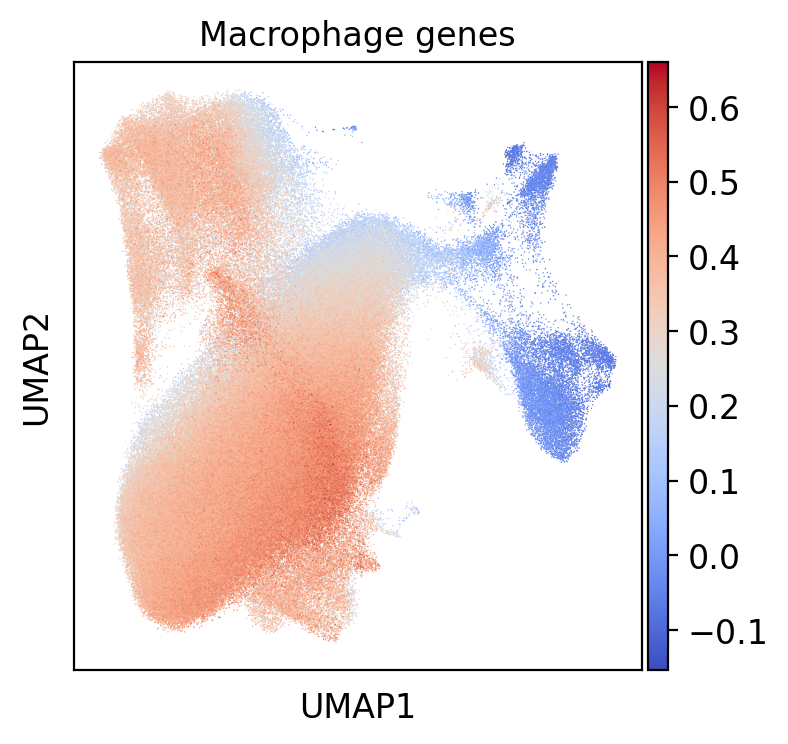

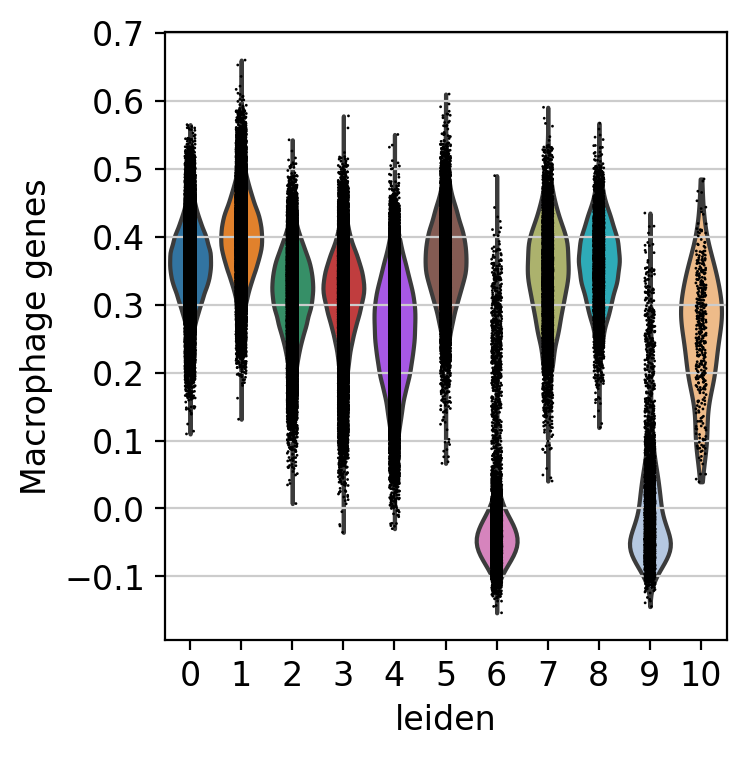

computing score 'DC1 genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DC1 genes', score of gene set (adata.obs).
    1194 total control genes are used. (0:00:09)


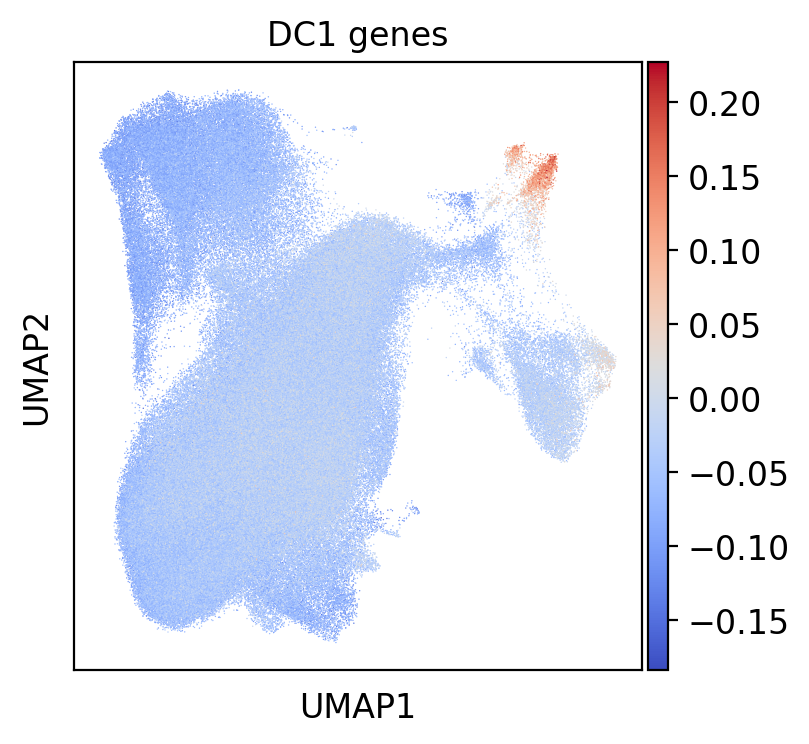

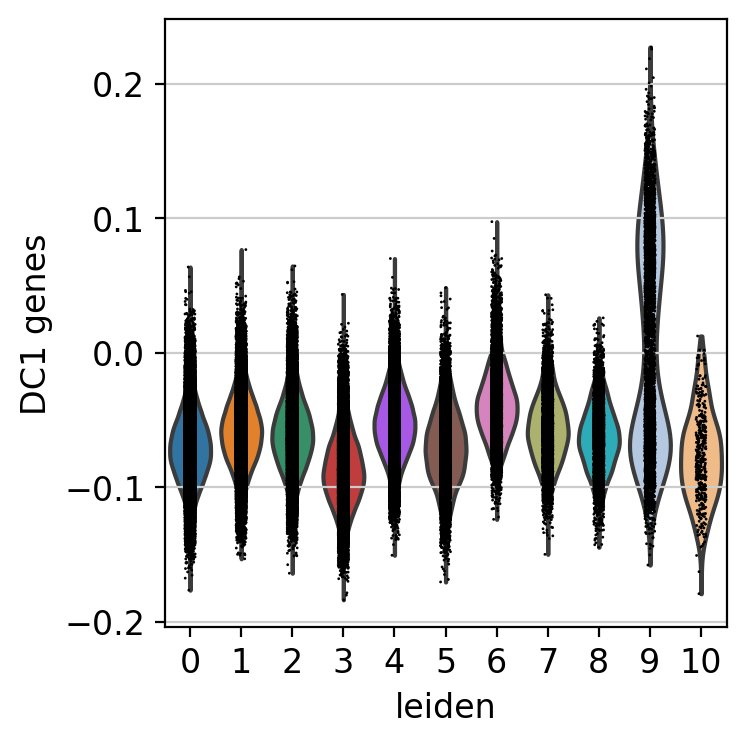

computing score 'DC2 genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DC2 genes', score of gene set (adata.obs).
    1170 total control genes are used. (0:00:09)


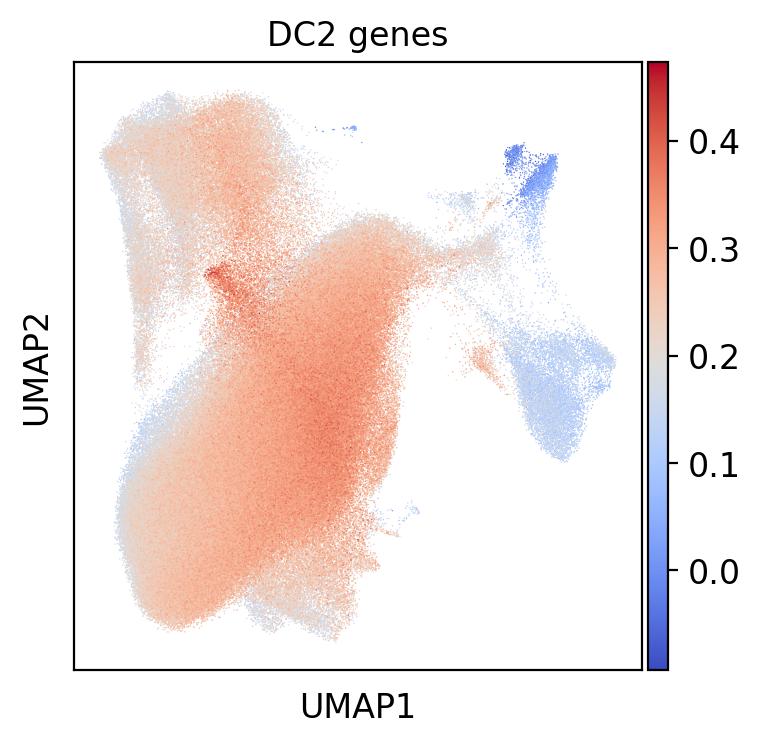

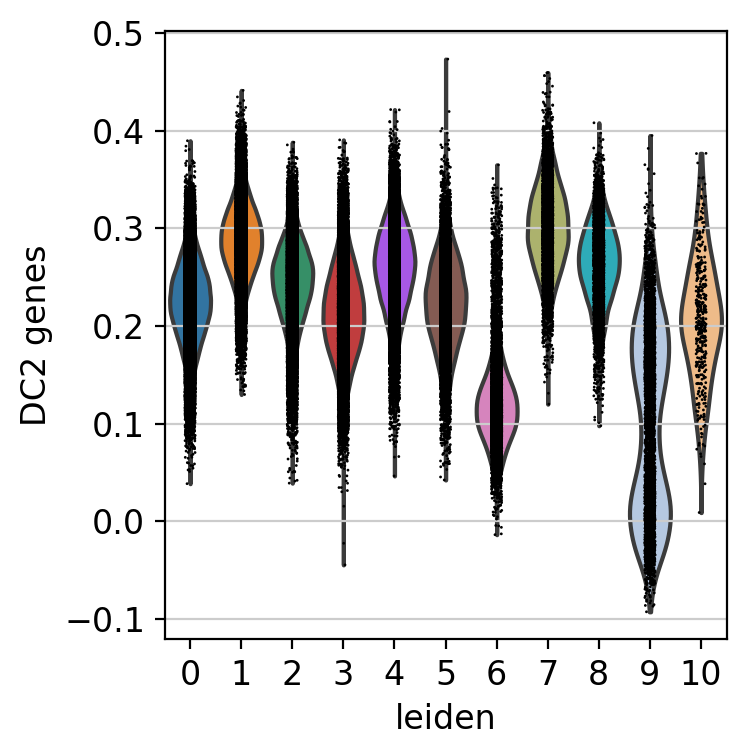

computing score 'mregDC genes'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'mregDC genes', score of gene set (adata.obs).
    1155 total control genes are used. (0:00:10)


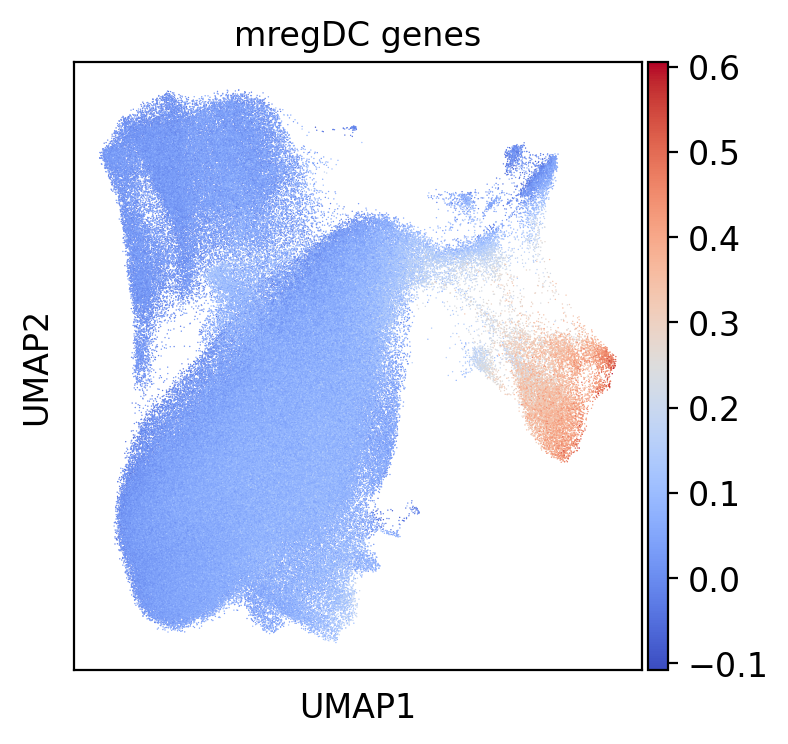

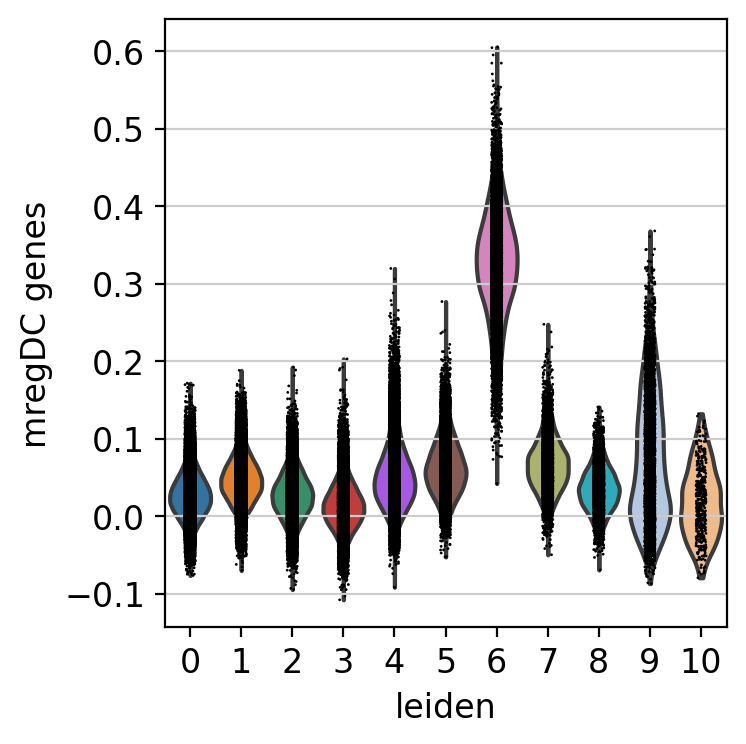

In [9]:
for i in [col for col in cGenes.columns if 'genes' in col]:
    myGeneList = [x for x in cGenes.loc[:,i] if x != ' ']
    myGeneList = [x.replace(".","-") for x in myGeneList]
    if(sum(pd.Series(myGeneList).isin(adata.var_names)) > 1):
        sc.tl.score_genes(adata=adata, gene_list=myGeneList, score_name=i)
        sc.pl.umap(adata, color=i, size=1, color_map="coolwarm")
        sc.pl.violin(adata, i, groupby='leiden')